In [ ]:
import os
import pandas as pd
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import re
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import KMeans
import seaborn as sns

sns.set_context("paper", font_scale=1.3)
sns.set_context('notebook')

sns.set_palette("deep")
sns.set_theme(font='sans-serif', font_scale=1.1)
sns.set_style("whitegrid")
deepBlue = sns.color_palette('deep')[0]
deepOrange = sns.color_palette('deep')[1]
deepGreen = sns.color_palette('deep')[2]
deepRed = sns.color_palette('deep')[3]

In [ ]:
def plot_signals(data_files, title_labels=[]):
    common_figsize = (6,5)
    output_dir = "results/real_lanechangecitos_morton/plots"  # Folder to save plots
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for j, file_path in enumerate(data_files):
        if ".csv" not in file_path:
            continue

        print(file_path)
        # Get the file basename without extension
        file_basename = os.path.splitext(os.path.basename(file_path))[0]
        data = pd.read_csv(file_path, sep=';')

        speed = [int(i) for i in data['Speed (m/s)']]
        steering_angle = [int(i) for i in data['Steering angle (deg)']]

        timestamps = data['timestamp']
        timestamps = timestamps.tolist()
        # Find the lane changes 
        fig, ax = plt.subplots(figsize = common_figsize)

        lanechanges = []
        tmp_vec = []
        for i, el in enumerate(timestamps):

            if i == len(timestamps) - 1:
                break

            if data['Lane change'].tolist()[i] == 0 and data['Lane change'].tolist()[i+1] == 1:
                tmp_vec.append(timestamps[i])

            if data['Lane change'].tolist()[i] == 1 and data['Lane change'].tolist()[i+1] == 0:
                tmp_vec.append(timestamps[i])
                lanechanges.append(np.copy(tmp_vec))
                tmp_vec = []
                
            
        for el in lanechanges:
            tmin, tmax = el[0], el[1]
            smin, smax = np.min([speed, steering_angle]), np.max([speed, steering_angle])
            ax.vlines(x=tmin, ymin=smin, ymax=smax, ls = '--', color = 'green')
            ax.vlines(x=tmax, ymin=smin, ymax=smax, ls = '--', color = 'red')

        ax.plot(timestamps, speed, label='Speed (m/s)', color = deepBlue)
        ax.plot(timestamps, steering_angle, label='Steering angle (deg)', color = deepOrange)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Signals")
        ax.set_title(title_labels[j])
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.legend(loc="upper right")
        plot_filename = os.path.join(output_dir, f"{file_basename}_signals.png")

        plt.show()
        plt.savefig(plot_filename, bbox_inches="tight")
        plt.close()
    
    return 


def plot_signals_lanechanges(data_files, title_labels=[]):
    common_figsize = (6,5)
    output_dir = "results/real_lanechangecitos_morton/plots"  # Folder to save plots
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for j, file_path in enumerate(data_files):
        if ".csv" not in file_path:
            continue

        print(file_path)

        # Get the file basename without extension
        file_basename = os.path.splitext(os.path.basename(file_path))[0]
        data = pd.read_csv(file_path, sep=';')

        speed = [int(i) for i in data['Speed (m/s)']]
        steering_angle = [int(i) for i in data['Steering angle (deg)']]

        timestamps = data['timestamp']
        timestamps = timestamps.tolist()
        # Find the lane changes 
        fig, ax = plt.subplots(figsize = common_figsize)

        lanechanges = []
        tmp_vec = []
        for i, el in enumerate(timestamps):

            if i == len(timestamps) - 1:
                break

            if data['Lane change'].tolist()[i] == 0 and data['Lane change'].tolist()[i+1] == 1:
                tmp_vec.append(timestamps[i])

            if data['Lane change'].tolist()[i] == 1 and data['Lane change'].tolist()[i+1] == 0:
                tmp_vec.append(timestamps[i])
                lanechanges.append(np.copy(tmp_vec))
                tmp_vec = []

        ax.plot(timestamps, speed, label='Speed (m/s)', color = deepBlue)
        ax.plot(timestamps, steering_angle, label='Steering angle (deg)', color = deepOrange)

        padding = 1 
        t_min, t_max = lanechanges[0][0] - padding, lanechanges[0][1] + padding
        ax.set_xlim([t_min, t_max])
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Signals")
        ax.set_title(title_labels[j])
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.legend(loc="upper right")
        plot_filename = os.path.join(output_dir, f"{file_basename}_lc1_signals.png")

        plt.show()
        plt.savefig(plot_filename, bbox_inches="tight")
        plt.close()
    
    return 

def plot_morton(data_files, title_labels=[]):
    common_figsize = (6,5)
    output_dir = "results/real_lanechangecitos_morton/plots"  # Folder to save plots

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # ===============================
    # DATA FILE PROCESSING
    # ===============================
    for j, file_path in enumerate(data_files):
        if ".csv" not in file_path:
            continue

        print(file_path)

        # Get the file basename without extension
        file_basename = os.path.splitext(os.path.basename(file_path))[0]
        data = pd.read_csv(file_path, sep=";")
        
        linelength = abs(data['timestamp'].iloc[0] - data['timestamp'].iloc[data.shape[0]-1])
        timestamps = data['timestamp']
        timestamps = timestamps.tolist()
        lanechanges = []
        tmp_vec = []

        for i, el in enumerate(timestamps):

            if i == len(timestamps) - 1:
                break

            if data['Lane change'].tolist()[i] == 0 and data['Lane change'].tolist()[i+1] == 1:
                tmp_vec.append(timestamps[i])

            if data['Lane change'].tolist()[i] == 1 and data['Lane change'].tolist()[i+1] == 0:
                tmp_vec.append(timestamps[i])
                lanechanges.append(np.copy(tmp_vec))
                tmp_vec = []
        
        linelength = abs(timestamps[0] - timestamps[-1])
        
        fig, ax = plt.subplots(figsize=common_figsize)

        ax.eventplot(data['Morton_Index'],
                        orientation='horizontal',
                        colors=["lightblue"],
                        alpha=0.1,
                        linelengths = linelength,
                        lineoffsets = linelength / 2)
        

        ax.scatter(data['Morton_Index'],
                    data['timestamp'],
                    color='black',
                    s=0.5,
                    alpha=0.8,
                    label="Timestamps", 
                    zorder=3)
        

        ax.set_xlabel("Morton Index")
        ax.set_ylabel("Time (s)")

        padding = 1 
        t_min, t_max = lanechanges[0][0] - padding, lanechanges[0][1] + padding
        ax.set_ylim([t_min, t_max])

        plot_filename = os.path.join(output_dir, f"{file_basename}_morton.png")
        
        if len(title_labels) == len(data_files):
            ax.title(title_labels[j])
       
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        plt.tight_layout()
        plt.show()
        plt.savefig(plot_filename, bbox_inches="tight")
        plt.close()

    return []

def plot_hilbert(data_files, title_labels=[]):
    common_figsize = (6,5)
    output_dir = "results/real_lanechangecitos_morton/plots"  # Folder to save plots

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # ===============================
    # DATA FILE PROCESSING
    # ===============================
    for j, file_path in enumerate(data_files):
        if ".csv" not in file_path:
            continue

        print(file_path)

        # Get the file basename without extension
        file_basename = os.path.splitext(os.path.basename(file_path))[0]
        plot_filename = os.path.join(output_dir, f"{file_basename}_hilbert.png")

        data = pd.read_csv(file_path, sep=";")
        
        linelength = abs(data['timestamp'].iloc[0] - data['timestamp'].iloc[data.shape[0]-1])
        timestamps = data['timestamp']
        timestamps = timestamps.tolist()
        lanechanges = []
        tmp_vec = []

        for i, el in enumerate(timestamps):

            if i == len(timestamps) - 1:
                break

            if data['Lane change'].tolist()[i] == 0 and data['Lane change'].tolist()[i+1] == 1:
                tmp_vec.append(timestamps[i])

            if data['Lane change'].tolist()[i] == 1 and data['Lane change'].tolist()[i+1] == 0:
                tmp_vec.append(timestamps[i])
                lanechanges.append(np.copy(tmp_vec))
                tmp_vec = []
        
        linelength = abs(timestamps[0] - timestamps[-1])
        
        fig, ax = plt.subplots(figsize=common_figsize)

        ax.eventplot(data['Hilbert_Index'],
                        orientation='horizontal',
                        colors=['lightblue'],
                        alpha=0.1,
                        linelengths = linelength,
                        lineoffsets = linelength / 2)
        

        ax.scatter(data['Hilbert_Index'],
                    data['timestamp'],
                    color='black',
                    s=0.5,
                    alpha=0.8,
                    label="Timestamps", 
                    zorder=3)
        

        ax.set_xlabel("Hilbert Index")
        ax.set_ylabel("Time (s)")

        padding = 1 
        t_min, t_max = lanechanges[0][0] - padding, lanechanges[0][1] + padding
        ax.set_ylim([t_min, t_max])
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        if len(title_labels) == len(data_files):
            ax.title(title_labels[j])
        
        plt.tight_layout()
        plt.show()
        plt.savefig(plot_filename, bbox_inches="tight")
        plt.close()

    return []

In [70]:
data = pd.read_csv('results/example_trajectories/emergency_braking.csv', sep=";")
data['Time (seconds)'] = data['sampleTimeStamp.seconds'] - 90066554
df = pd.DataFrame(data=data)
df.to_csv('results/example_trajectories/emergency_braking.csv', sep=";", index=False)

results/real_lanechangecitos_morton/2018-07-27--06-03-57_3_merged_data_sensor.csv


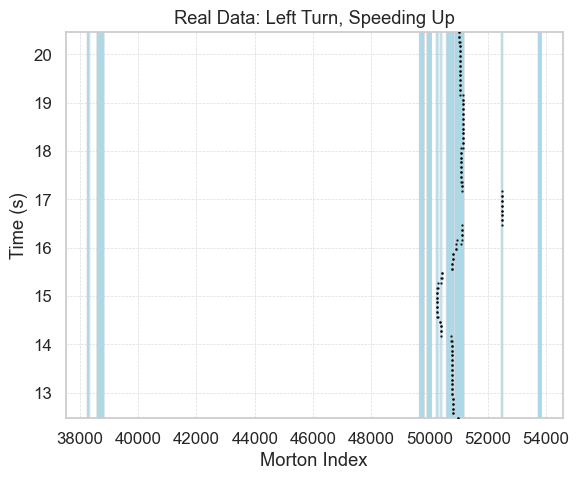

results/real_lanechangecitos_morton/2018-07-31--20-50-28_6_merged_data_sensor.csv


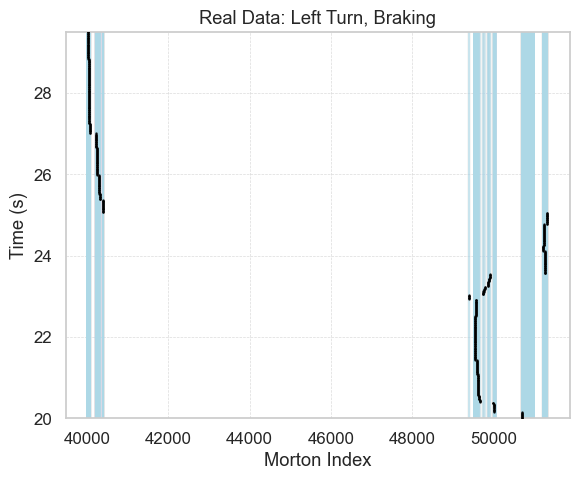

results/real_lanechangecitos_hilbert/2018-07-27--06-03-57_3_merged_data_sensor.csv


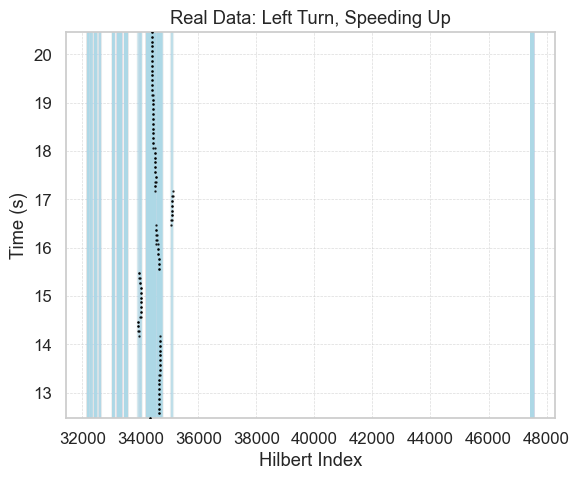

results/real_lanechangecitos_hilbert/2018-07-31--20-50-28_6_merged_data_sensor.csv


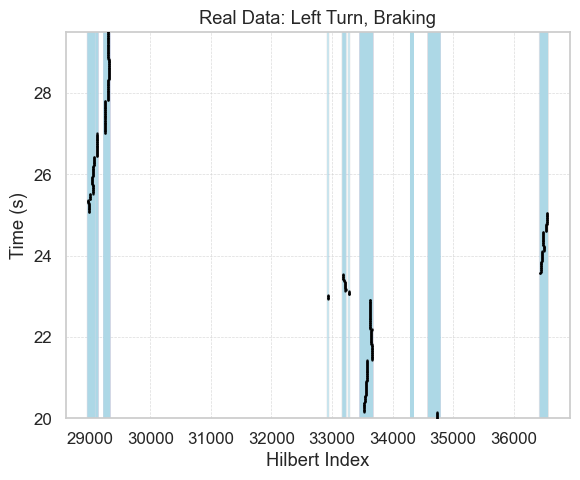

[]

In [66]:
titles = ['Real Data: Left Turn, Speeding Up', 'Real Data: Left Turn, Braking']

real_data_files = ['results/real_lanechangecitos_morton/2018-07-27--06-03-57_3_merged_data_sensor.csv',
                   'results/real_lanechangecitos_morton/2018-07-31--20-50-28_6_merged_data_sensor.csv']

plot_morton(data_files=real_data_files, title_labels=titles)

real_data_files = ['results/real_lanechangecitos_hilbert/2018-07-27--06-03-57_3_merged_data_sensor.csv',
                   'results/real_lanechangecitos_hilbert/2018-07-31--20-50-28_6_merged_data_sensor.csv']
plot_hilbert(data_files=real_data_files, title_labels=titles)

In [ ]:
titles = ['Emergency braking', 'Real Data: Left Turn, Braking']

real_data_files = ['results/example_trajectories/emergency_braking.csv']

plot_morton(data_files=real_data_files, title_labels=titles)

real_data_files = ['results/real_lanechangecitos_hilbert/2018-07-27--06-03-57_3_merged_data_sensor.csv',
                   'results/real_lanechangecitos_hilbert/2018-07-31--20-50-28_6_merged_data_sensor.csv']
plot_hilbert(data_files=real_data_files, title_labels=titles)

results/real_lanechangecitos_hilbert/2018-07-27--06-03-57_3_merged_data_sensor.csv


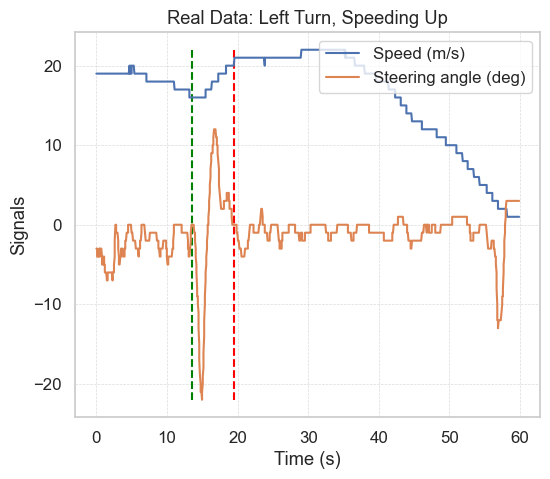

results/real_lanechangecitos_hilbert/2018-07-31--20-50-28_6_merged_data_sensor.csv


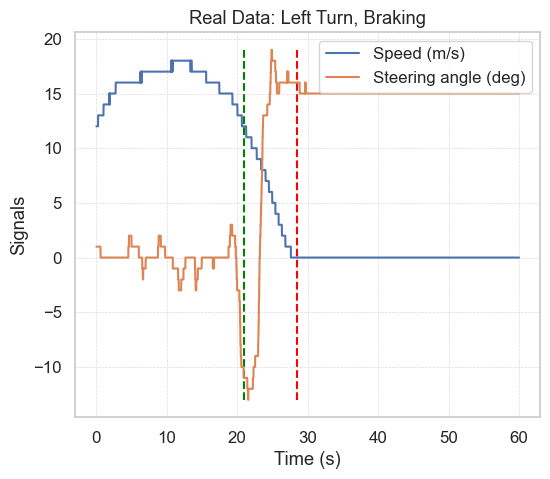

results/real_lanechangecitos_hilbert/2018-07-27--06-03-57_3_merged_data_sensor.csv


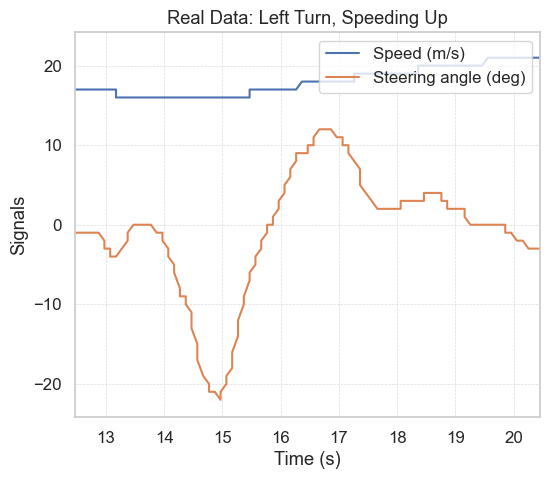

results/real_lanechangecitos_hilbert/2018-07-31--20-50-28_6_merged_data_sensor.csv


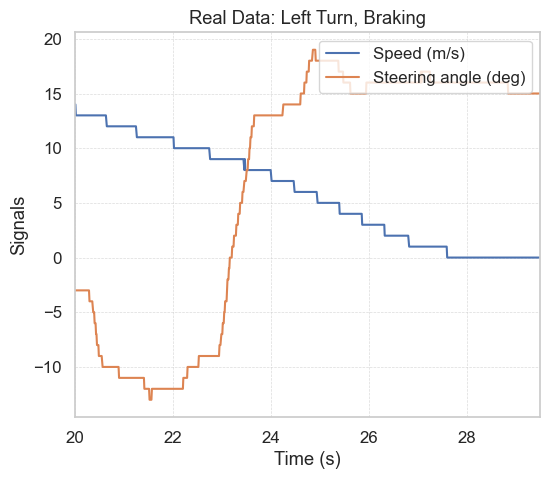

In [67]:
# Set transformation for speed and steering angle
offsets, scales = {"Speed (m/s)": 105}, {"Speed (m/s)": 4}
offsets["Steering angle (deg)"] = 150
scales["Steering angle (deg)"] = 1

plot_signals(data_files=real_data_files, title_labels=titles)
plot_signals_lanechanges(data_files=real_data_files, title_labels=titles)


results/synthetic_lanechangecitos_morton/lcright_fixedmaxangle_speeddown_3.csv


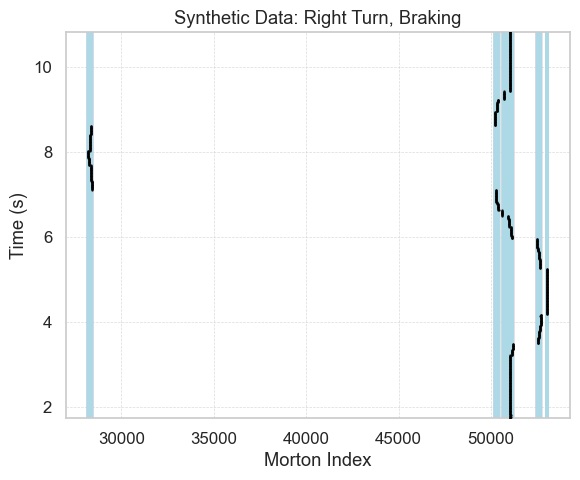

results/synthetic_lanechangecitos_morton/lcright_fixedmaxangle_speedup_3.csv


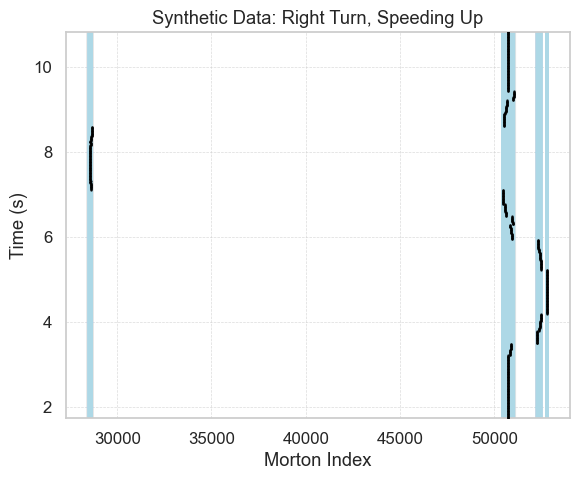

results/synthetic_lanechangecitos_morton/lcleft_fixedmaxangle_speeddown_3.csv


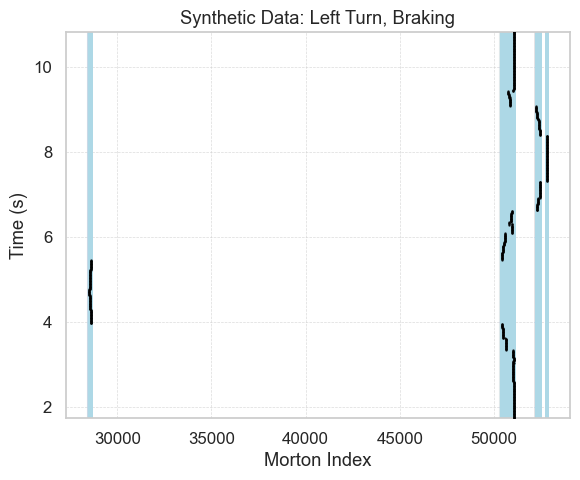

results/synthetic_lanechangecitos_morton/lcleft_fixedmaxangle_speedup_3.csv


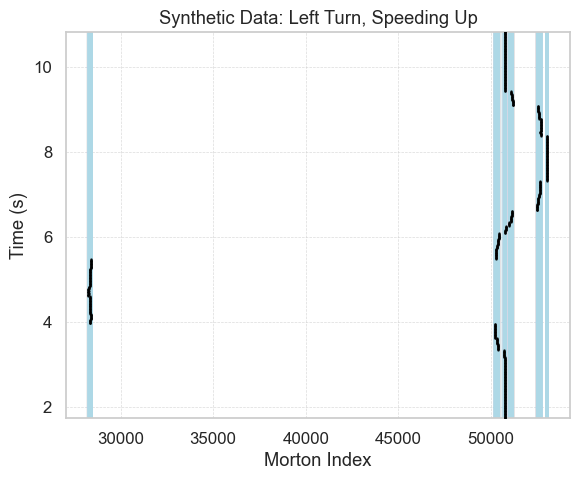

results/synthetic_lanechangecitos_hilbert/lcright_fixedmaxangle_speeddown_3.csv


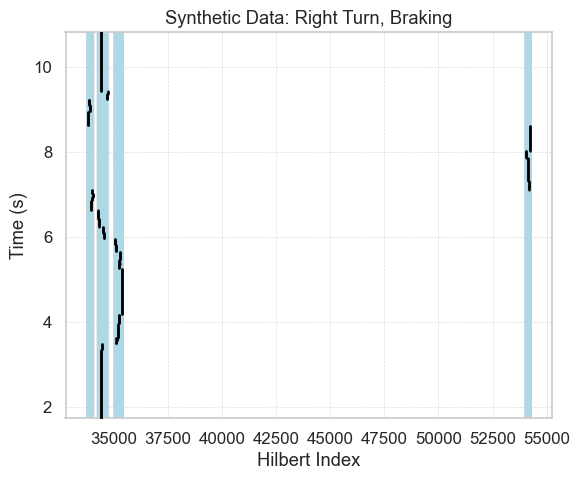

results/synthetic_lanechangecitos_hilbert/lcright_fixedmaxangle_speedup_3.csv


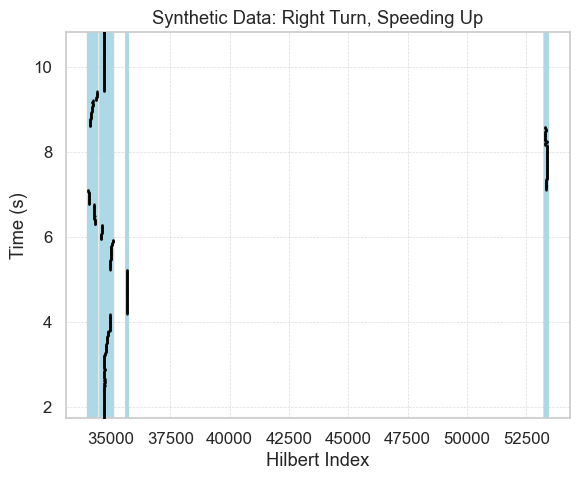

results/synthetic_lanechangecitos_hilbert/lcleft_fixedmaxangle_speeddown_3.csv


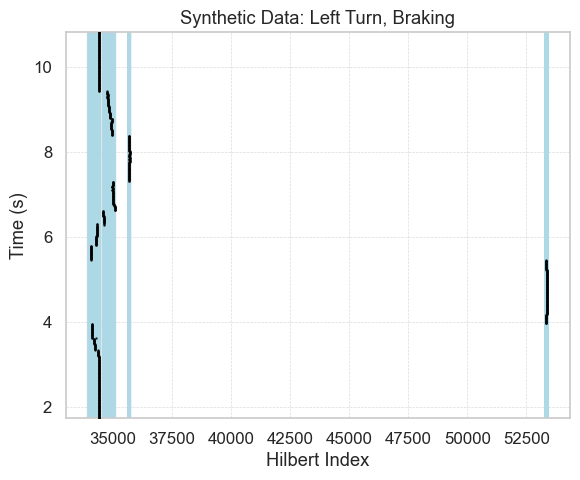

results/synthetic_lanechangecitos_hilbert/lcleft_fixedmaxangle_speedup_3.csv


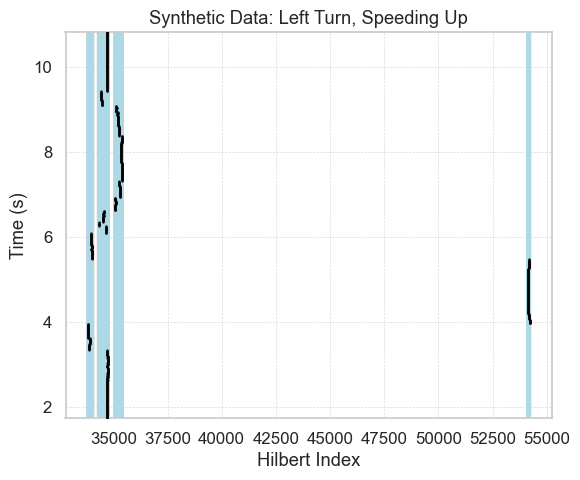

[]

In [68]:
morton_data_files = ['results/synthetic_lanechangecitos_morton/lcright_fixedmaxangle_speeddown_3.csv',
                       'results/synthetic_lanechangecitos_morton/lcright_fixedmaxangle_speedup_3.csv',
                       'results/synthetic_lanechangecitos_morton/lcleft_fixedmaxangle_speeddown_3.csv',
                       'results/synthetic_lanechangecitos_morton/lcleft_fixedmaxangle_speedup_3.csv']


hilbert_data_files = ['results/synthetic_lanechangecitos_hilbert/lcright_fixedmaxangle_speeddown_3.csv',
                       'results/synthetic_lanechangecitos_hilbert/lcright_fixedmaxangle_speedup_3.csv',
                       'results/synthetic_lanechangecitos_hilbert/lcleft_fixedmaxangle_speeddown_3.csv',
                       'results/synthetic_lanechangecitos_hilbert/lcleft_fixedmaxangle_speedup_3.csv']

titles = ['Synthetic Data: Right Turn, Braking', 
            'Synthetic Data: Right Turn, Speeding Up',
            'Synthetic Data: Left Turn, Braking',
            'Synthetic Data: Left Turn, Speeding Up']


plot_morton(data_files=morton_data_files, title_labels=titles)
plot_hilbert(data_files=hilbert_data_files, title_labels=titles)


results/synthetic_lanechangecitos_hilbert/lcright_fixedmaxangle_speeddown_3.csv


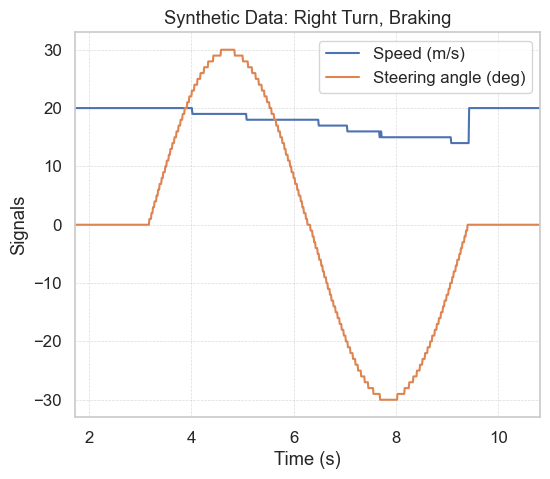

results/synthetic_lanechangecitos_hilbert/lcright_fixedmaxangle_speedup_3.csv


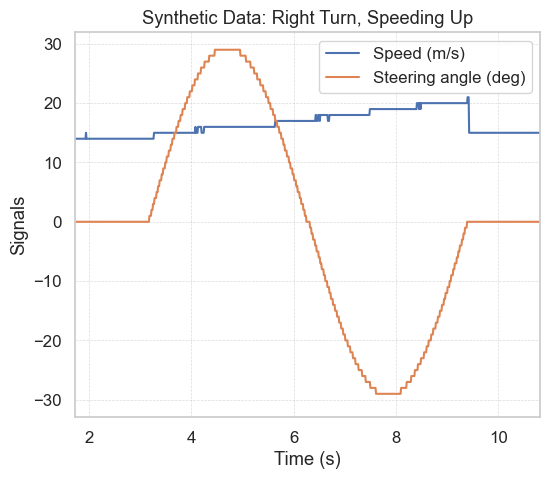

results/synthetic_lanechangecitos_hilbert/lcleft_fixedmaxangle_speeddown_3.csv


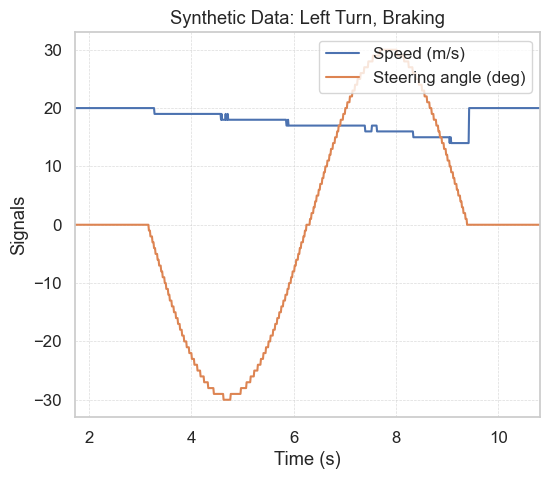

results/synthetic_lanechangecitos_hilbert/lcleft_fixedmaxangle_speedup_3.csv


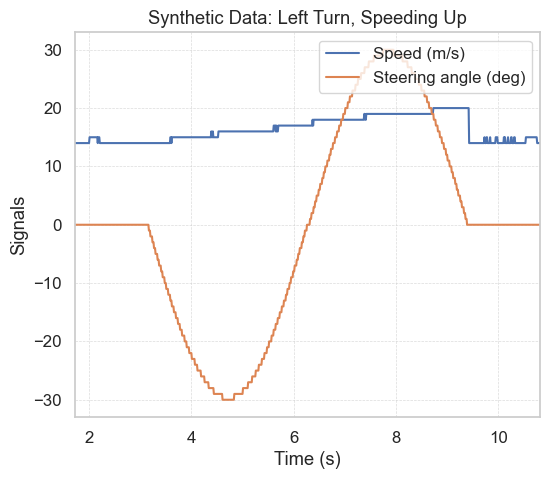

In [69]:
titles = ['Synthetic Data: Right Turn, Braking', 
            'Synthetic Data: Right Turn, Speeding Up',
            'Synthetic Data: Left Turn, Braking',
            'Synthetic Data: Left Turn, Speeding Up']

plot_signals_lanechanges(data_files=hilbert_data_files, title_labels=titles)